## 1.4 신경망으로 문제를 풀다
## 1.4.1 스파이럴 데이터 셋

In [3]:
# 코드 실행 시 dataset/spiral.py 파일의 np.int를 np.int32 or np.int64로 코드 수정 해 주어야한다.
import sys
sys.path.append('..')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt

from dataset import spiral

x, t = spiral.load_data()
print('x', x.shape)  # (300, 2)
print('t', t.shape)

x (300, 2)
t (300, 3)


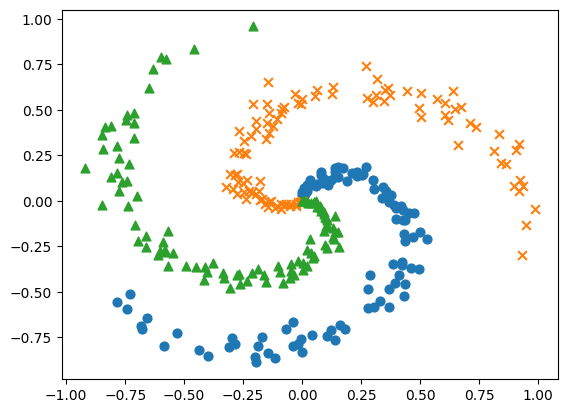

In [4]:
# 데이터점 플롯
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

## 1.4.2 신경망 구현

In [5]:
import sys
sys.path.append('..')
from common.np import *
from common.layers import Affine, Sigmoid, SoftmaxWithLoss


class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 가중치와 편향 초기화
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)
        
        # 레이어 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()
        
        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss
    
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

## 1.4.3 학습용 코드

In [6]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm  # pip install tqdm
from common.optimizer import SGD
from dataset import spiral
from two_layer_net import TwoLayerNet

matplotlib.rc('font', family='Malgun Gothic')  # linux
# matplotlib.rc('font', family='AppleGothic')  # Mac

# 1. 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# 2. 데이터 읽기, 모델과 옵티마이저 생성
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2,
                    hidden_size=hidden_size,
                    output_size=3)
optimizer = SGD(lr=learning_rate)

# 학습에 사용하는 변수
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in tqdm(range(max_epoch)):
    # 3. 데이터 셔플링
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]
    
    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]
        
        # 기울기를 구해 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        
        total_loss += loss
        loss_count += 1
        
        # 정기적으로 학습 경과 출력
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print(f'| 에폭 {epoch+1} | 반복{iters+1}/{max_iters} | 손실 {avg_loss:.2f}')
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

100%|██████████| 300/300 [00:00<00:00, 2204.69it/s]

| 에폭 1 | 반복10/10 | 손실 1.13
| 에폭 2 | 반복10/10 | 손실 1.13
| 에폭 3 | 반복10/10 | 손실 1.12
| 에폭 4 | 반복10/10 | 손실 1.12
| 에폭 5 | 반복10/10 | 손실 1.11
| 에폭 6 | 반복10/10 | 손실 1.14
| 에폭 7 | 반복10/10 | 손실 1.16
| 에폭 8 | 반복10/10 | 손실 1.11
| 에폭 9 | 반복10/10 | 손실 1.12
| 에폭 10 | 반복10/10 | 손실 1.13
| 에폭 11 | 반복10/10 | 손실 1.12
| 에폭 12 | 반복10/10 | 손실 1.11
| 에폭 13 | 반복10/10 | 손실 1.09
| 에폭 14 | 반복10/10 | 손실 1.08
| 에폭 15 | 반복10/10 | 손실 1.04
| 에폭 16 | 반복10/10 | 손실 1.03
| 에폭 17 | 반복10/10 | 손실 0.96
| 에폭 18 | 반복10/10 | 손실 0.92
| 에폭 19 | 반복10/10 | 손실 0.92
| 에폭 20 | 반복10/10 | 손실 0.87
| 에폭 21 | 반복10/10 | 손실 0.85
| 에폭 22 | 반복10/10 | 손실 0.82
| 에폭 23 | 반복10/10 | 손실 0.79
| 에폭 24 | 반복10/10 | 손실 0.78
| 에폭 25 | 반복10/10 | 손실 0.82
| 에폭 26 | 반복10/10 | 손실 0.78
| 에폭 27 | 반복10/10 | 손실 0.76
| 에폭 28 | 반복10/10 | 손실 0.76
| 에폭 29 | 반복10/10 | 손실 0.78
| 에폭 30 | 반복10/10 | 손실 0.75
| 에폭 31 | 반복10/10 | 손실 0.78
| 에폭 32 | 반복10/10 | 손실 0.77
| 에폭 33 | 반복10/10 | 손실 0.77
| 에폭 34 | 반복10/10 | 손실 0.78
| 에폭 35 | 반복10/10 | 손실 0.75
| 에폭 36 | 반복10/10 | 손실 0.74
|

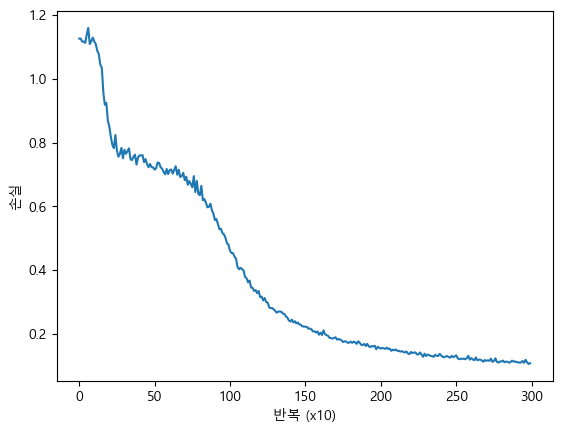

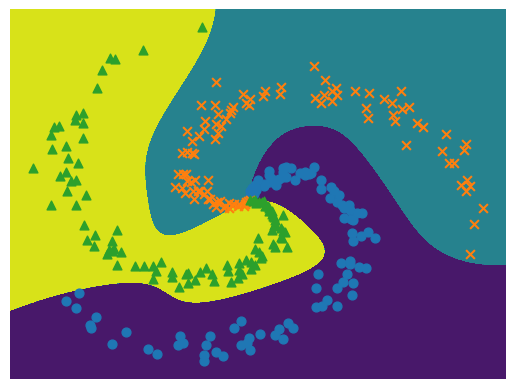

In [7]:
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('반복 (x10)')
plt.ylabel('손실')
plt.show()

# 경계 영역 플롯
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# 데이터점 플롯
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

## 1.4.4 Trainer 클래스

| 에폭 1 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 2 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 3 |  반복 1 / 10 | 시간 0[s] | 손실 1.13
| 에폭 4 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 5 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 6 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 7 |  반복 1 / 10 | 시간 0[s] | 손실 1.14
| 에폭 8 |  반복 1 / 10 | 시간 0[s] | 손실 1.16
| 에폭 9 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 10 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 11 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 12 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 13 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 14 |  반복 1 / 10 | 시간 0[s] | 손실 1.09
| 에폭 15 |  반복 1 / 10 | 시간 0[s] | 손실 1.08
| 에폭 16 |  반복 1 / 10 | 시간 0[s] | 손실 1.04
| 에폭 17 |  반복 1 / 10 | 시간 0[s] | 손실 1.03
| 에폭 18 |  반복 1 / 10 | 시간 0[s] | 손실 0.94
| 에폭 19 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 20 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 21 |  반복 1 / 10 | 시간 0[s] | 손실 0.87
| 에폭 22 |  반복 1 / 10 | 시간 0[s] | 손실 0.85
| 에폭 23 |  반복 1 / 10 | 시간 0[s] | 손실 0.80
| 에폭 24 |  반복 1 / 10 | 시간 0[s] | 손실 0.79
| 에폭 25 |  반복 1 / 10 | 시간

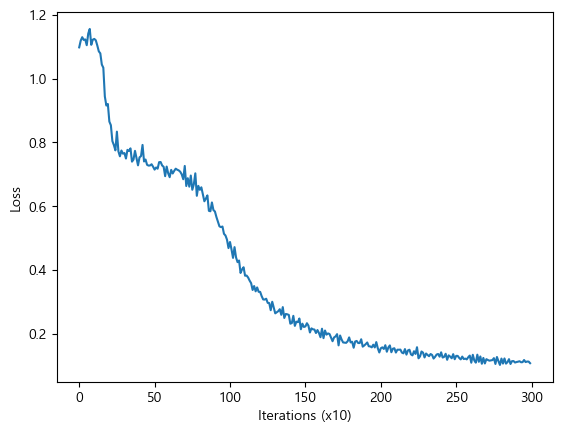

In [8]:
%matplotlib inline
import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral
from two_layer_net import TwoLayerNet

# 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()